In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
mart = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
mart.shape

(8523, 12)

We can see that our dataset have 8523 rows and 12 columns. 

In [4]:
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

From the above data we can see that few columns in the dataset have null values. 

In [5]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


From the above data we can check the types of dataset columns. Int and float represensent numerical values and object represents string values. 

In [6]:
col1 = mart.columns

In [7]:
for i in col1:
    print(mart[i].value_counts())


FDW13    10
FDG33    10
FDX20     9
FDP25     9
FDF56     9
         ..
FDN52     1
FDC23     1
FDT35     1
FDY43     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat             

The abive details shows the count of the values of each column. 

In [8]:
print(mart['Item_Weight'].isnull().sum())
print(mart['Outlet_Size'].isnull().sum())

1463
2410


1. The column Item_Weight is having 1463 null values present in it. 
2. The column Outlet_Size is having 1463 null values present in it. 

<function matplotlib.pyplot.show(close=None, block=None)>

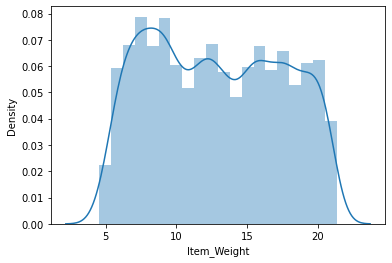

In [9]:
plt.figure()
sns.distplot(mart['Item_Weight'])
plt.show

From the above representation we can see that data is not distributed normally. So we will proceed with median to fill nan values

1. removing null values
2. As the column Item_Weight has numerical value we will use median to fill the null values and Outlet_Size has object data type so will use mode to fill the null values. 

In [10]:
mart['Item_Weight'] = mart['Item_Weight'].fillna(mart['Item_Weight'].mean())

In [11]:
print(mart['Item_Weight'].isnull().sum())

0


In [12]:
mart['Outlet_Size'] = mart['Outlet_Size'].fillna(mart['Outlet_Size'].mode()[0])

In [13]:
print(mart['Outlet_Size'].isnull().sum())

0


We have successfully removed the null values from the columns

In [14]:
col1 = mart.columns
col1

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
mart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Showing forst 5 record of the dataset

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

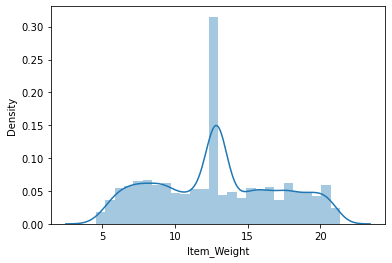

In [16]:
sns.distplot(mart['Item_Weight'])

We can see that data is skewed as the data is not normally distributed.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

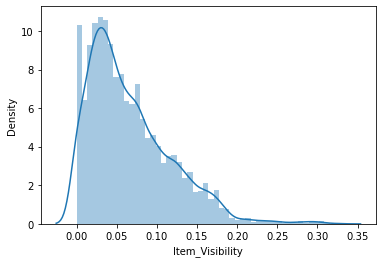

In [17]:
sns.distplot(mart['Item_Visibility'])

We have left skewness in this columns. 

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

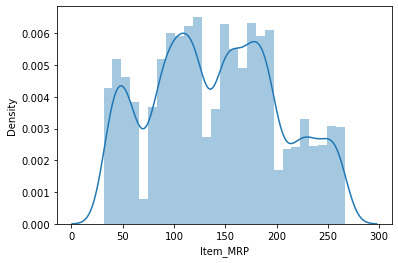

In [18]:
sns.distplot(mart['Item_MRP'])

Here we can see that the data is skewed because there are few los values products and few high or medium valued projects.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

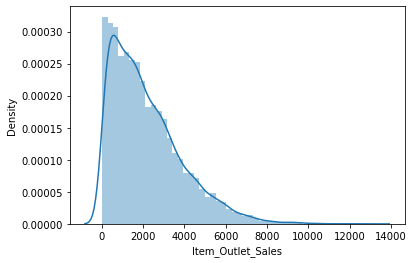

In [19]:
sns.distplot(mart['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

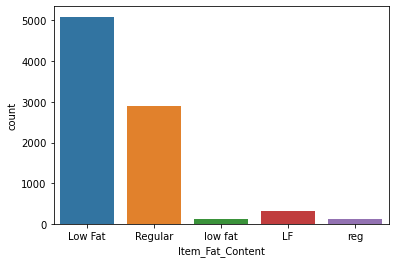

In [20]:
sns.countplot(mart['Item_Fat_Content'])

Here we can check that low_fat products are higher in number than regular 

<function matplotlib.pyplot.show(close=None, block=None)>

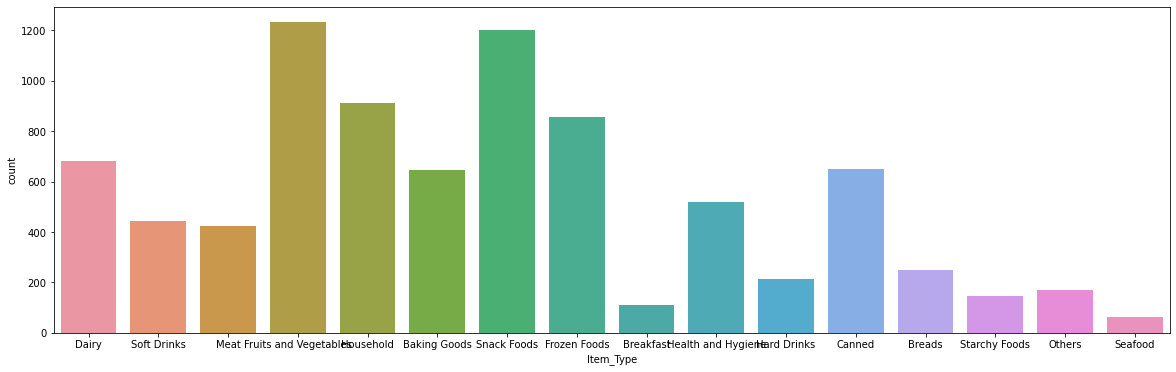

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(mart['Item_Type'])
plt.show

The above graph shows tha types of products in the mart. fruits abd vegetables are hugely sold in the marts and snacks and goods after that. breakfast and seafood are leat selling type in the mart

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

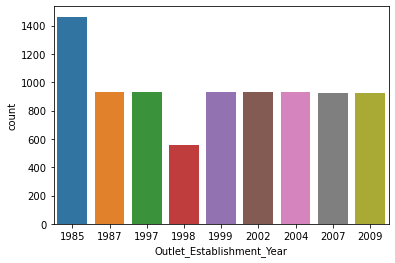

In [22]:
sns.countplot(mart['Outlet_Establishment_Year'])

from the above graph we can say that the most of the mart's stores are started in year 1985 and after till 2009 the mart have opened same no of stores apart from 1987 where the mart had opened lesser(600) stores

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

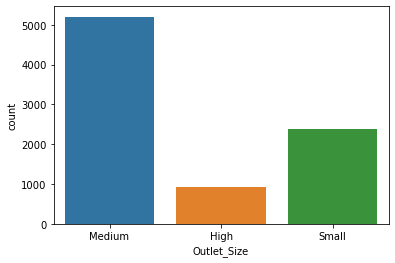

In [23]:
sns.countplot(mart['Outlet_Size'])

From the above graph we can say that most of the stores are medium sized and lesser stores witrh high mart size. 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

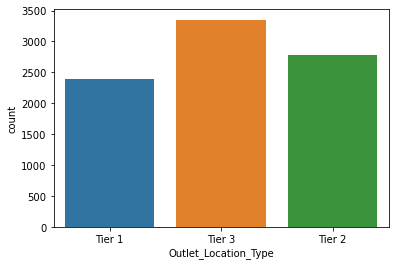

In [24]:
sns.countplot(mart['Outlet_Location_Type'])

From the above graph we can say that most of the stores are at tier 3 location and least at tier 1 location

<function matplotlib.pyplot.show(close=None, block=None)>

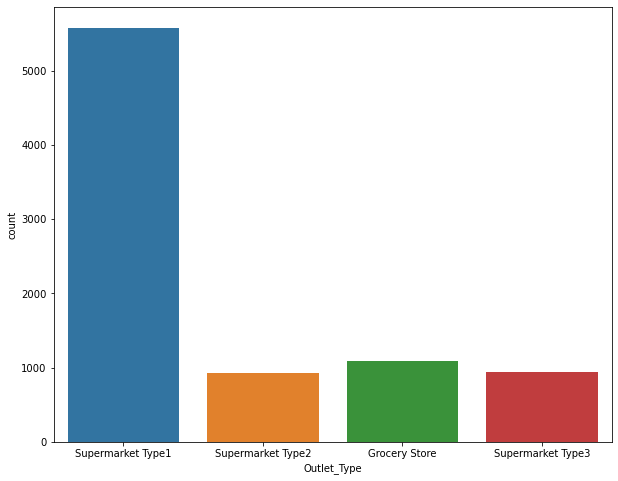

In [25]:
plt.figure(figsize = (10,8))
sns.countplot(mart['Outlet_Type'])
plt.show

from the above graph we can say that most pf the marts are or type: supermarket type 1 and also they have grocery stores. 

<Figure size 864x432 with 0 Axes>

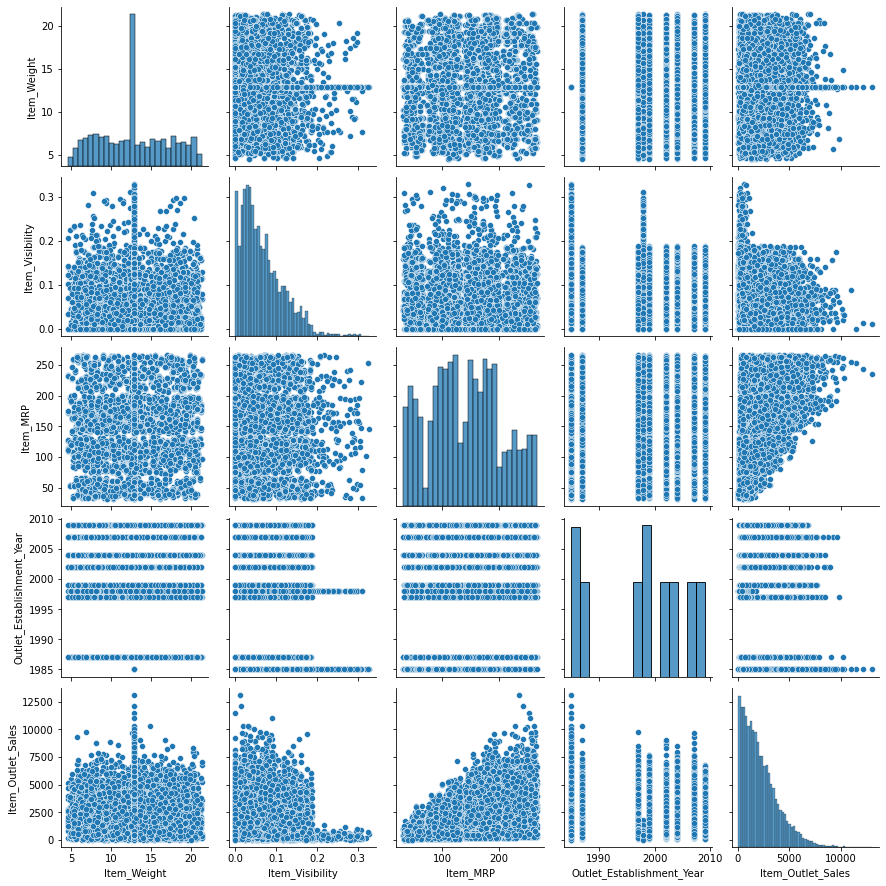

In [26]:
plt.figure(figsize = (12,6))
sns.pairplot(mart)
plt.show()

The above is pairplot for the dataset. This represents the data set with numerical values and shows relationship between different variables and our label.

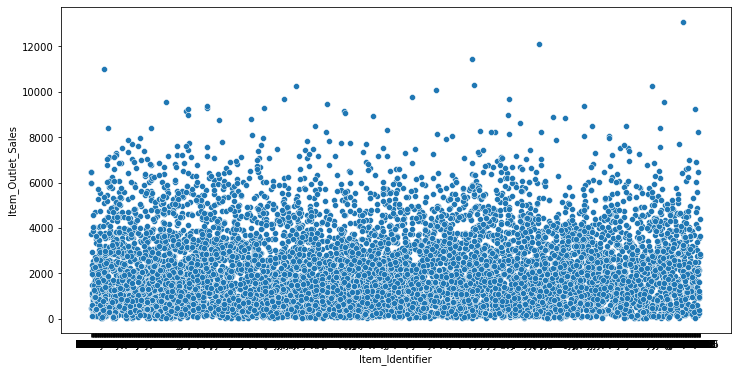

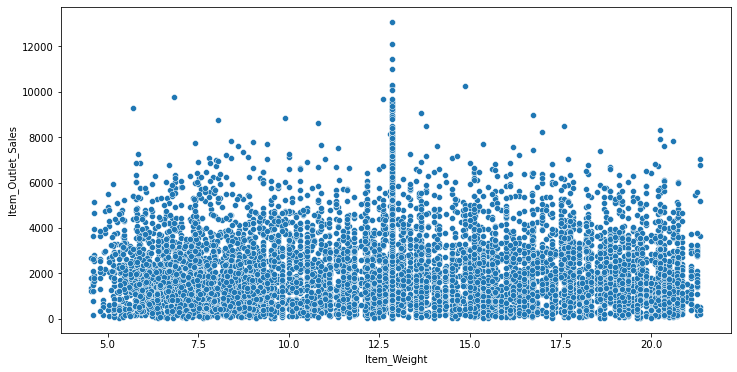

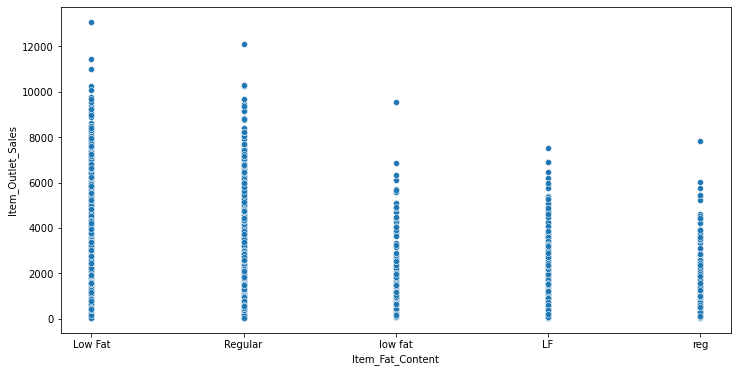

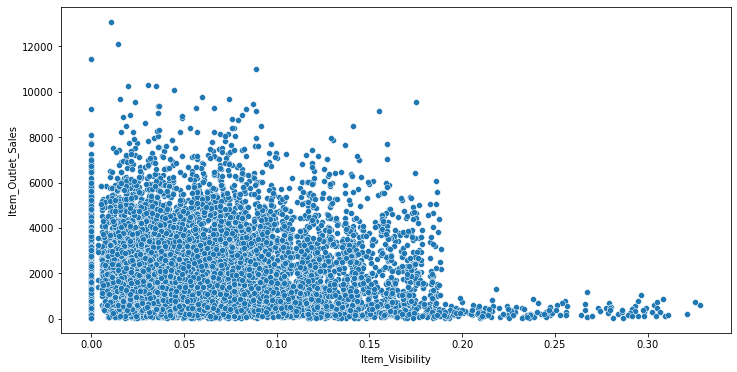

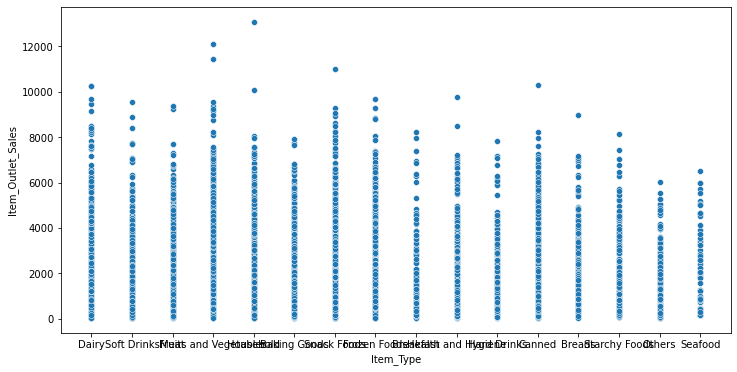

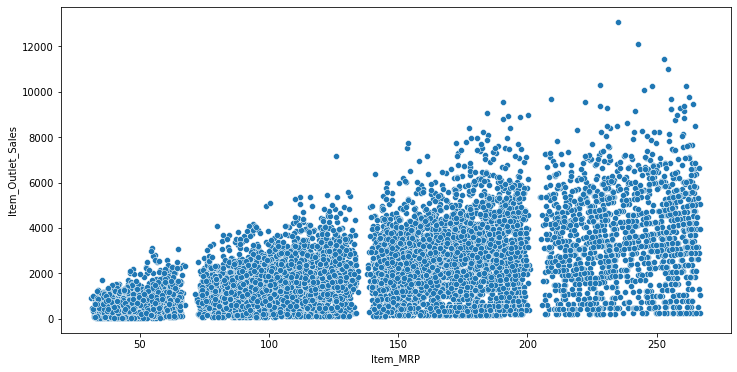

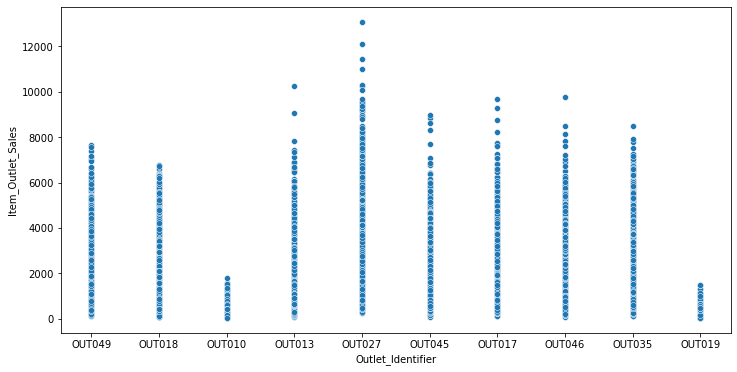

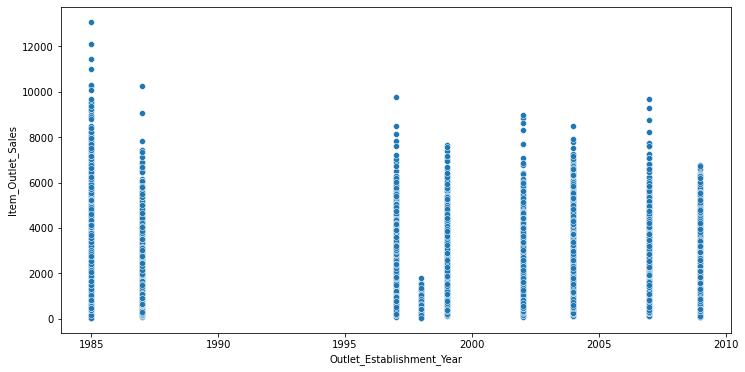

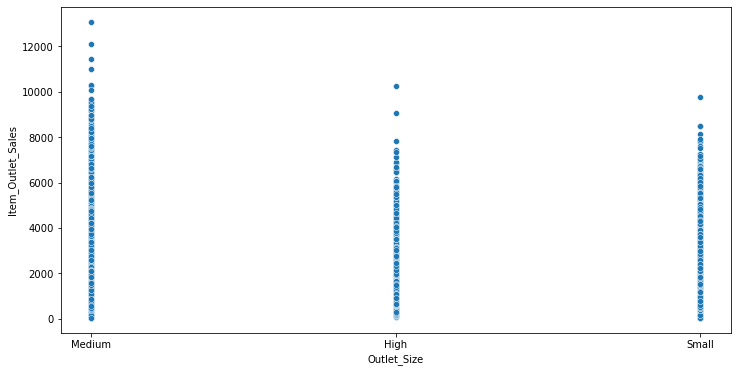

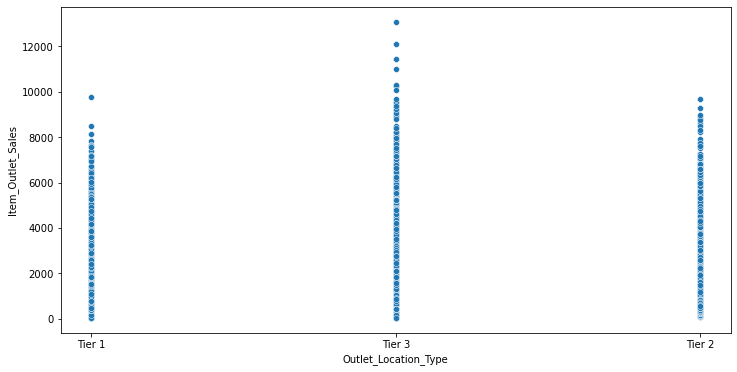

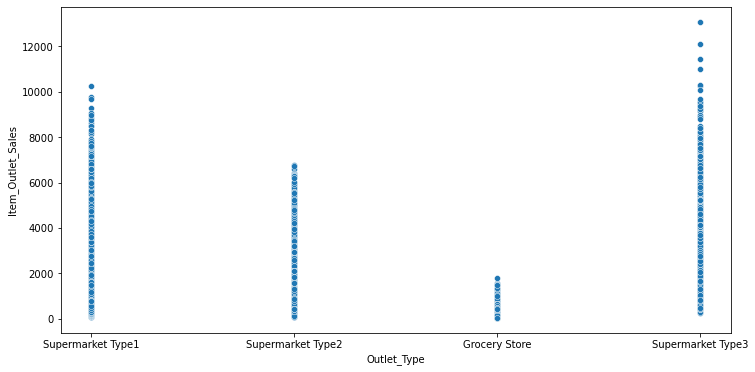

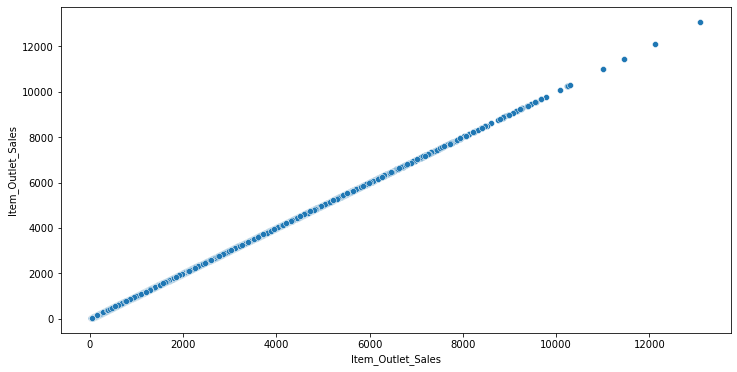

In [27]:
for i in col1:
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = i , y = 'Item_Outlet_Sales' , data = mart)
    plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mart["Item_Fat_Content"] = le.fit_transform(mart['Item_Fat_Content'])
mart["Item_Type"] = le.fit_transform(mart['Item_Type'])
mart["Outlet_Identifier"] = le.fit_transform(mart['Outlet_Identifier'])
mart["Outlet_Size"] = le.fit_transform(mart['Outlet_Size'])
mart["Outlet_Location_Type"] = le.fit_transform(mart['Outlet_Location_Type'])
mart["Outlet_Type"] = le.fit_transform(mart['Outlet_Type'])

Above we converted the valiues to numerical using encodig

Item_Weight                      AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Item_Fat_Content              AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Item_Visibility               AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Item_Type                     AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Item_MRP                      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Outlet_Identifier             AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Outlet_Establishment_Year     AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Outlet_Size                     AxesSubplot(0.125,0.518913;0.0945122x0.16413)
Outlet_Location_Type         AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
Outlet_Type                  AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
Item_Outlet_Sales            AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
dtype: object

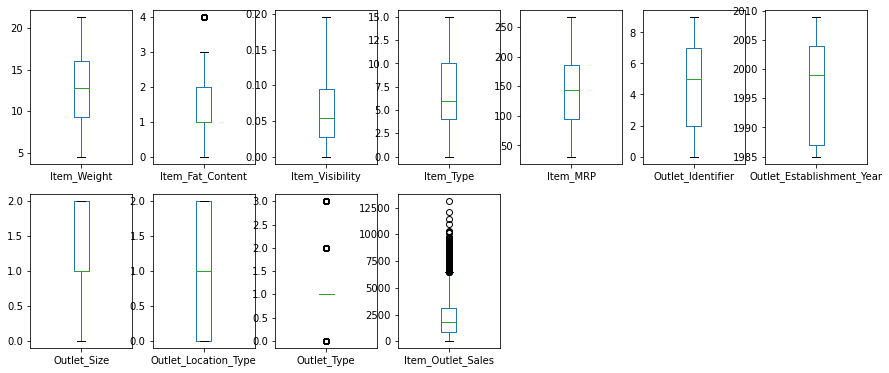

In [32]:
mart.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

We can see that above 3 columns having outliers:-
   1. Item_Visibility
   2. Outlet_Type

Will proceed further to remove the outiers. We can use:-
    
    1. Z-score
    2. IQR
    
 We will try the z-score first

25 quartile of is: 0.026989477499999998
75 quartile of is: 0.0945852925
The IQR value is: 0.067595815
The high value is 0.195979015
The low value is -0.07440424500000001


Item_Visibility    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

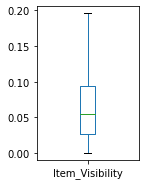

In [29]:
q1 = mart['Item_Visibility'].quantile(.25)
q3 = mart['Item_Visibility'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


mart['Item_Visibility'] = np.where(
    mart['Item_Visibility'] > high_range,
    high_range,
    np.where(
        mart['Item_Visibility'] < low_range,
        low_range,
        mart['Item_Visibility']
    )
)

mart['Item_Visibility'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 1.0
75 quartile of is: 1.0
The IQR value is: 0.0
The high value is 1.0
The low value is 1.0


Outlet_Type    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

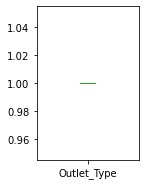

In [34]:
q1 = mart['Outlet_Type'].quantile(.25)
q3 = mart['Outlet_Type'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)


mart['Outlet_Type'] = np.where(
    mart['Outlet_Type'] > high_range,
    high_range,
    np.where(
        mart['Outlet_Type'] < low_range,
        low_range,
        mart['Outlet_Type']
    )
)

mart['Outlet_Type'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

Outliers removed from the columns using IQR method. 

From the above graph we see that output item output sales is having high corelations with item_mrp. 

In [35]:
mart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1.0,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,1.0,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,1,0,1.0,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,1,2,1.0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,0,2,1.0,994.7052


<AxesSubplot:>

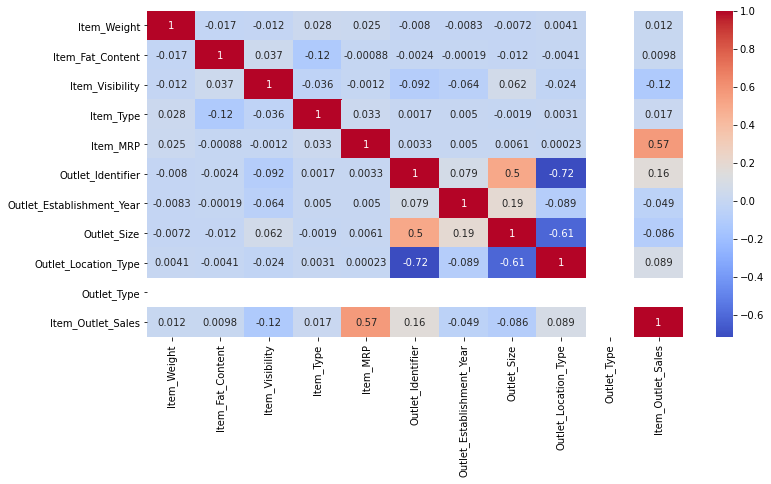

In [38]:
plt.figure(figsize = (12,6))
sns.heatmap(mart.corr(),annot=True,cmap='coolwarm')

From the above graph we can see that our label is how much correlated with the independant variables. The label is negatively corelated with:-
1. Outlet_size
2. outlet_establishment_year
3. item_visibility

In [39]:
mart.drop('Outlet_Establishment_Year', axis = 1, inplace =True)
mart.drop('Item_Identifier', axis = 1, inplace =True)
mart.drop('Outlet_Identifier', axis = 1, inplace =True)

In [40]:
mart.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1,0,1.0,3735.1380
1,5.92,2,0.019278,14,48.2692,1,2,1.0,443.4228
2,17.50,1,0.016760,10,141.6180,1,0,1.0,2097.2700
3,19.20,2,0.000000,6,182.0950,1,2,1.0,732.3800
4,8.93,1,0.000000,9,53.8614,0,2,1.0,994.7052


In [43]:
mart.shape

(8523, 9)

In [44]:
x = mart.iloc[:,0:8]
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,1,0,1.0
1,5.920,2,0.019278,14,48.2692,1,2,1.0
2,17.500,1,0.016760,10,141.6180,1,0,1.0
3,19.200,2,0.000000,6,182.0950,1,2,1.0
4,8.930,1,0.000000,9,53.8614,0,2,1.0
...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1.0
8519,8.380,2,0.046982,0,108.1570,1,1,1.0
8520,10.600,1,0.035186,8,85.1224,2,1,1.0
8521,7.210,2,0.145221,13,103.1332,1,2,1.0


In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [69]:
x = sc.fit_transform(x)

In [70]:
x

array([[-0.84187169, -0.57284357, -1.00862813, ..., -0.28458121,
        -1.36933384,  0.        ],
       [-1.64170589,  0.97809218, -0.94247279, ..., -0.28458121,
         1.09156913,  0.        ],
       [ 1.09855449, -0.57284357, -0.99403357, ..., -0.28458121,
        -1.36933384,  0.        ],
       ...,
       [-0.53424315, -0.57284357, -0.61674377, ...,  1.38127431,
        -0.13888236,  0.        ],
       [-1.33644372,  0.97809218,  1.6362903 , ..., -0.28458121,
         1.09156913,  0.        ],
       [ 0.45963367, -0.57284357, -0.41829281, ...,  1.38127431,
        -1.36933384,  0.        ]])

In [71]:
y = mart['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

We have separated the dataset to X and y to fetch it for testing and training purpose. 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [73]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svc = SVR()
rnd = RandomForestRegressor()

In [74]:
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("AT random state",i,"the model performing good")

AT random state 1 the model performing good
AT random state 33 the model performing good
AT random state 130 the model performing good
AT random state 135 the model performing good
AT random state 150 the model performing good


We have found the random state where our model is performing good

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 150)
print(dtc.fit(x_train,y_train))
print(lr.fit(x_train,y_train))
print(svc.fit(x_train,y_train))
print(rnd.fit(x_train,y_train))

DecisionTreeRegressor()
LinearRegression()
SVR()
RandomForestRegressor()


We have fitted the train data to our model. 

In [76]:
pred_dtc = dtc.predict(x_test)
pred_lr = lr.predict(x_test)
pred_svc = svc.predict(x_test)
pred_rnd = rnd.predict(x_test)

We have predicted some result using the testing data(20%) that we have with us. 

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_dtc))
print('Means Squared Error',mean_squared_error(y_test,pred_dtc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_dtc)))
print('Model Score',r2_score(y_test,pred_dtc))

Error Calculations: -
Means absolute error 1161.0790527859237
Means Squared Error 2695931.594905729
Root mean square 1641.9292295667706
Model Score 0.10654120720323867


In [78]:
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_lr))
print('Means Squared Error',mean_squared_error(y_test,pred_lr))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Model Score',r2_score(y_test,pred_lr))

Error Calculations: -
Means absolute error 1049.26862325901
Means Squared Error 1977399.881197323
Root mean square 1406.2005124438417
Model Score 0.344669829876452


In [79]:
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_svc))
print('Means Squared Error',mean_squared_error(y_test,pred_svc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_svc)))
print('Model Score',r2_score(y_test,pred_svc))

Error Calculations: -
Means absolute error 1264.5510458615763
Means Squared Error 2881524.9656922235
Root mean square 1697.505512713353
Model Score 0.04503370110504279


In [80]:
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_rnd))
print('Means Squared Error',mean_squared_error(y_test,pred_rnd))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_rnd)))
print('Model Score',r2_score(y_test,pred_rnd))

Error Calculations: -
Means absolute error 882.4259649302054
Means Squared Error 1485647.3336715787
Root mean square 1218.871335979142
Model Score 0.5076415604267767


Above we calculated the mean absolute error, mean squarred error and squre root of the error, they represents the difference between the actual value and represents that there are some Fn and TN in the data. 

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' :[100,200,300,400,500,600,700,800],
               'criterion'  :['squared_error','mse','absolute_error','poisson'],
               'max_depth' :[300,400,500,600,700,800],
               'min_samples_split' :[100,200,300,400,500]   
             }

grid_cv = GridSearchCV(estimator=rnd, param_grid = parameters)
grid_cv.fit(x_test, y_test)
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))

KeyboardInterrupt: 

In [81]:
from sklearn.model_selection import cross_val_score
score_dtc=cross_val_score(dtc,x,y,cv=5)
print('\n')
print(score_dtc)
print(score_dtc.mean())
print(score_dtc.std())
print('------------------------')
score_lr=cross_val_score(lr,x,y,cv=5)
print(score_lr)
print(score_lr.mean())
print(score_lr.std())
print('------------------------')
score_svc=cross_val_score(svc,x,y,cv=5)
print(score_svc)
print(score_svc.mean())
print(score_svc.std())
print('------------------------')
score_rnd=cross_val_score(rnd,x,y,cv=5)
print(score_rnd)
print(score_rnd.mean())
print(score_rnd.std())
print('------------------------')



[0.08953862 0.03921092 0.02124028 0.13835826 0.09692939]
0.07705549295604586
0.04208652681972989
------------------------
[0.35558077 0.34679135 0.33971517 0.34407589 0.33145708]
0.34352405368239136
0.007955673177906866
------------------------
[0.04136521 0.06028214 0.04105711 0.0509105  0.05367443]
0.049457877806293474
0.007390782998464731
------------------------
[0.51993593 0.48184894 0.45712354 0.49355914 0.50917385]
0.4923282801742275
0.021893655756742028
------------------------


In [82]:
print('Model Score',r2_score(y_test,pred_dtc))
print('Mean Score After CV',score_dtc.mean())
print("Model Score is", r2_score(y_test,pred_dtc)-score_dtc.mean())
print('\n')      
      
print('Model Score',r2_score(y_test,pred_lr))
print('Mean Score After CV',score_lr.mean())
print("Model Score is", r2_score(y_test,pred_lr)-score_lr.mean())
print('\n')      
      
print('Model Score',r2_score(y_test,pred_svc))
print('Mean Score After CV',score_svc.mean())
print("Model Score is", r2_score(y_test,pred_svc)-score_svc.mean())
print('\n')      
      
print('Model Score',r2_score(y_test,pred_rnd))
print('Mean Score After CV',score_rnd.mean())
print("Model Score is", r2_score(y_test,pred_rnd)-score_rnd.mean())

Model Score 0.10654120720323867
Mean Score After CV 0.07705549295604586
Model Score is 0.029485714247192818


Model Score 0.344669829876452
Mean Score After CV 0.34352405368239136
Model Score is 0.0011457761940606437


Model Score 0.04503370110504279
Mean Score After CV 0.049457877806293474
Model Score is -0.004424176701250684


Model Score 0.5076415604267767
Mean Score After CV 0.4923282801742275
Model Score is 0.015313280252549188


In [83]:
import pickle
filename = 'big_mart_Sales.pkl'
pickle.dump(rnd, open(filename, 'wb'))